# Random Forest Classification Obesity Level

## Importing the libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from lime.lime_tabular import LimeTabularExplainer
import dice_ml

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## Importing the dataset

In [ ]:
seed_value = 42

In [ ]:
try:
    df = pd.read_csv('Dataset/DataObesity_Test.csv')
    df = pd.read_csv('Dataset/DataObesity_Test.csv')
except FileNotFoundError:
    print("File 'DataObesity_Test.csv' tidak ditemukan. Pastikan Anda sudah mengunduhnya dari Kaggle.")
    exit()

## Preprocessing Data

### Transformation Data

In [ ]:
df['Height'] = df['Height'] * 100
df['Age'] = df['Age'].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   int64  
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [ ]:
print("--- TIPE DATA LAMA ---")
print(df.dtypes)
kolom_float = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for kolom in kolom_float:
    df[kolom] = df[kolom].astype('int64')

print("\n\n--- TIPE DATA BARU ---")
print(df.dtypes)



--- TIPE DATA LAMA ---
Age                                 int64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


--- TIPE DATA BARU ---
Age                                 int64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC          

In [ ]:
X_transformed = df.drop('NObeyesdad', axis=1)
y =  df['NObeyesdad']

categorical_features = ['Gender','family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE','SCC', 'CALC','MTRANS']



### Visualitation Data


Memulai proses penampilan plot...
Tutup jendela plot yang muncul untuk melanjutkan ke plot berikutnya.


/tmp/ipython-input-3667667619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


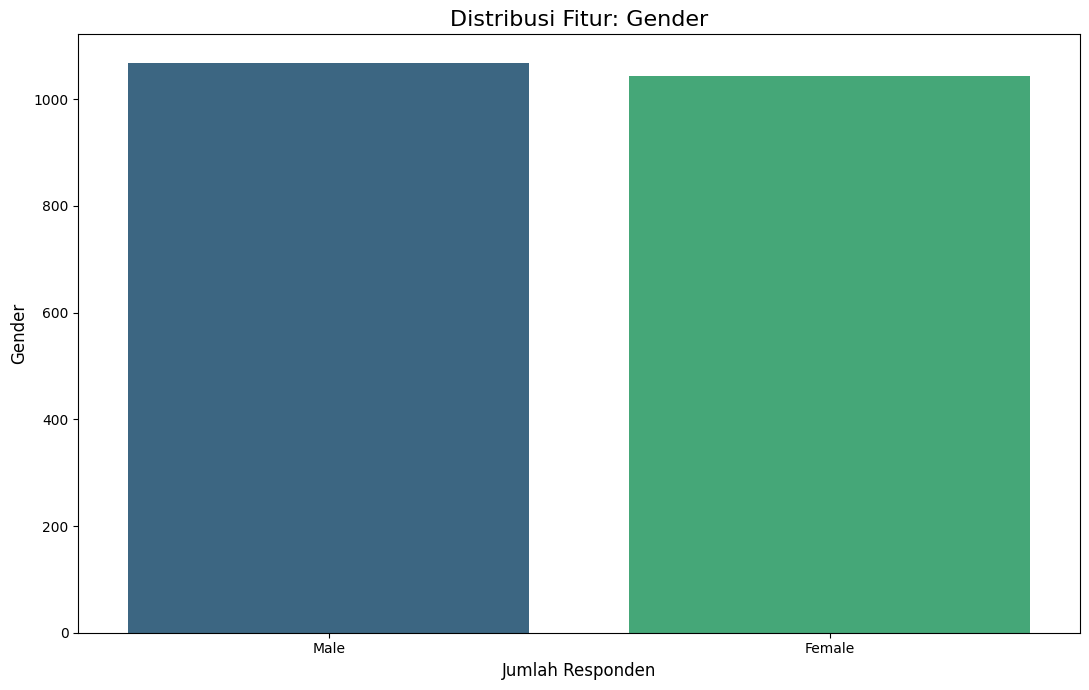

/tmp/ipython-input-3667667619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


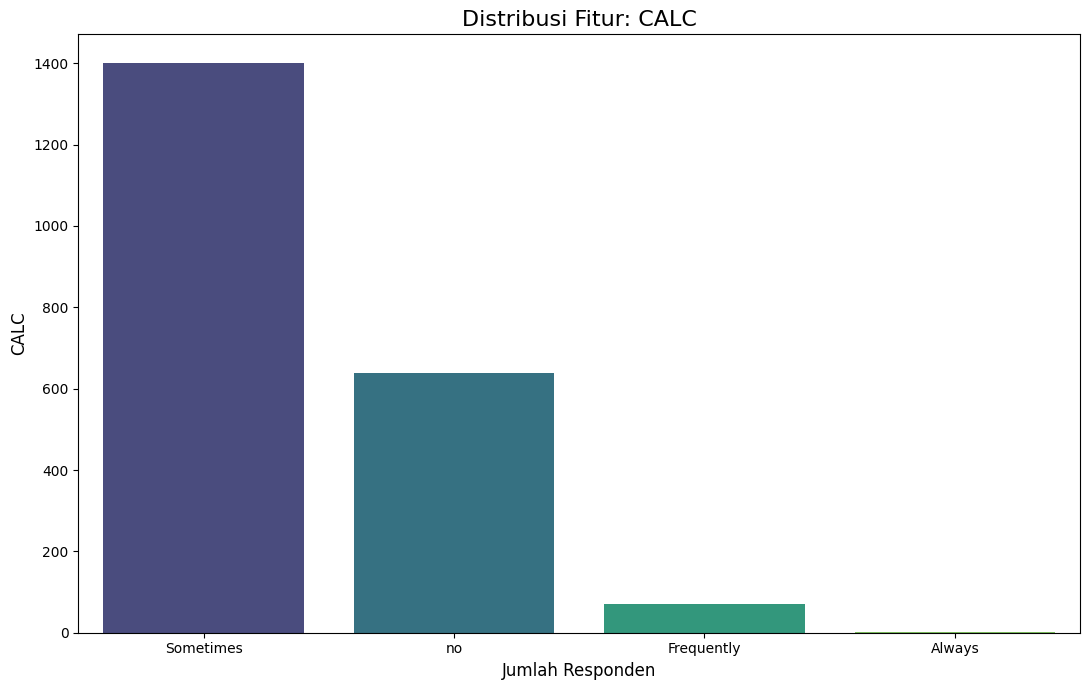

/tmp/ipython-input-3667667619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


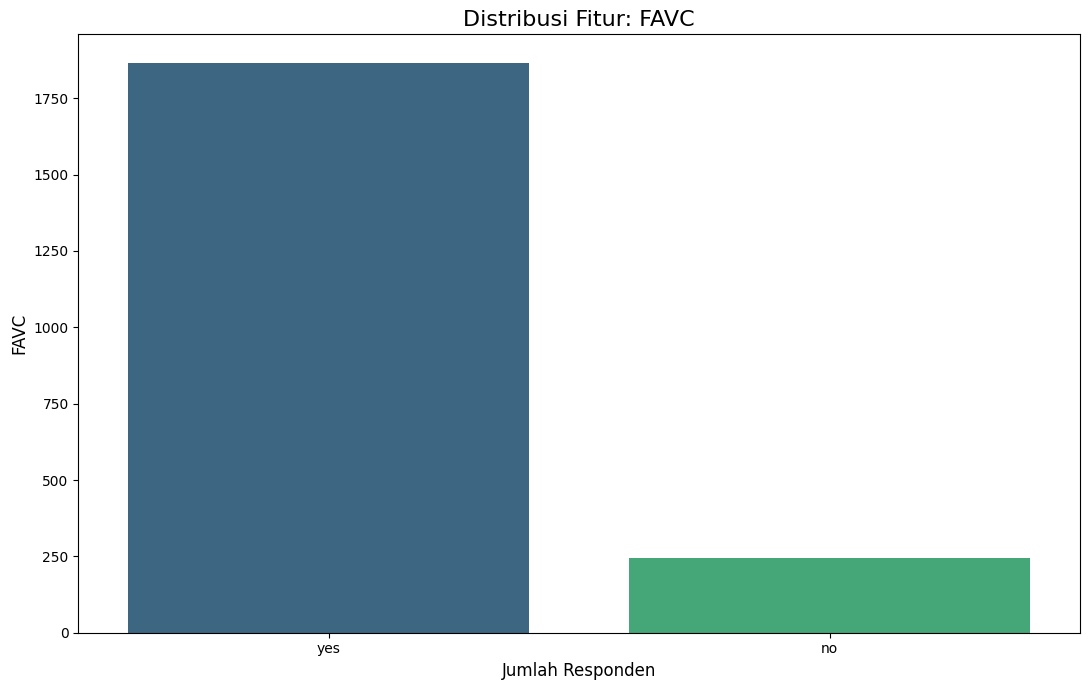

/tmp/ipython-input-3667667619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


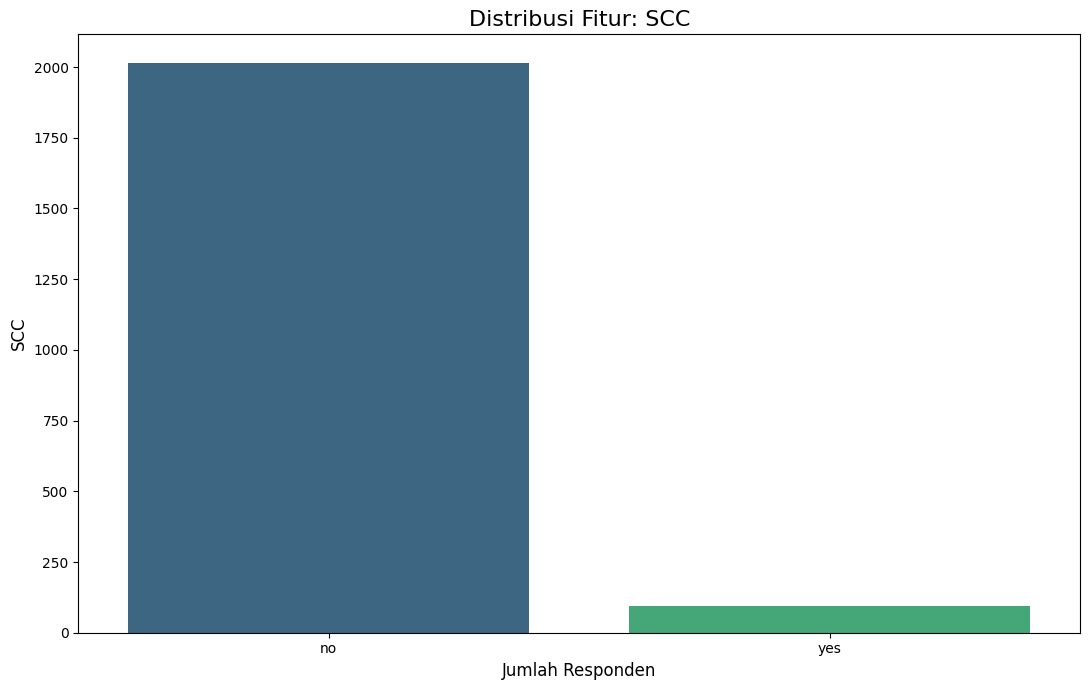

/tmp/ipython-input-3667667619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


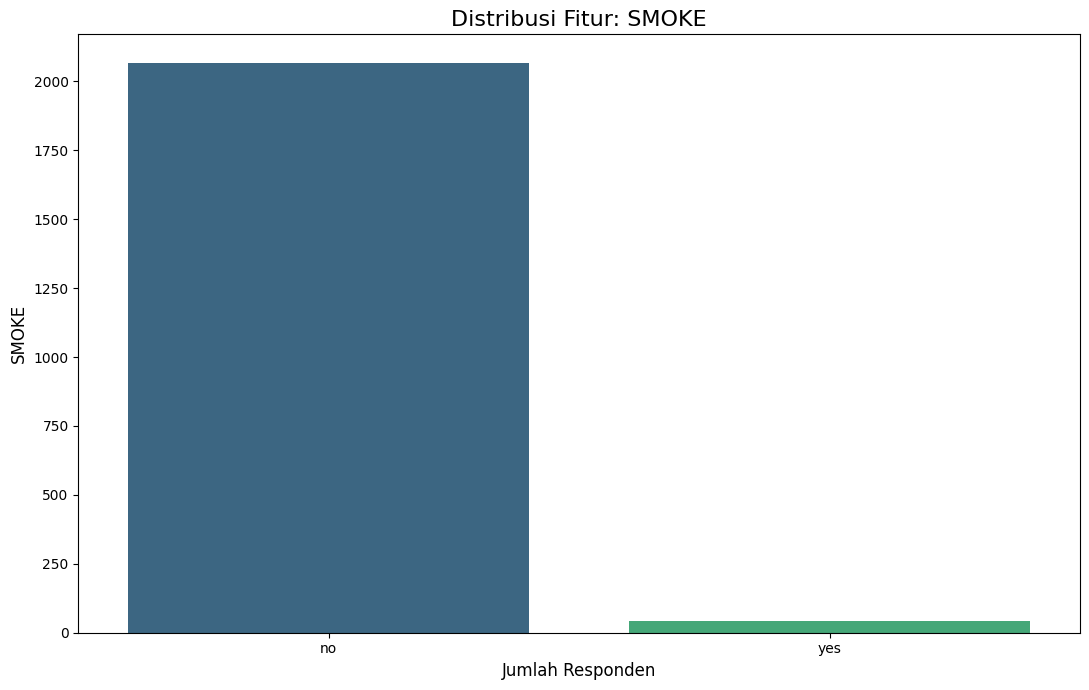

/tmp/ipython-input-3667667619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


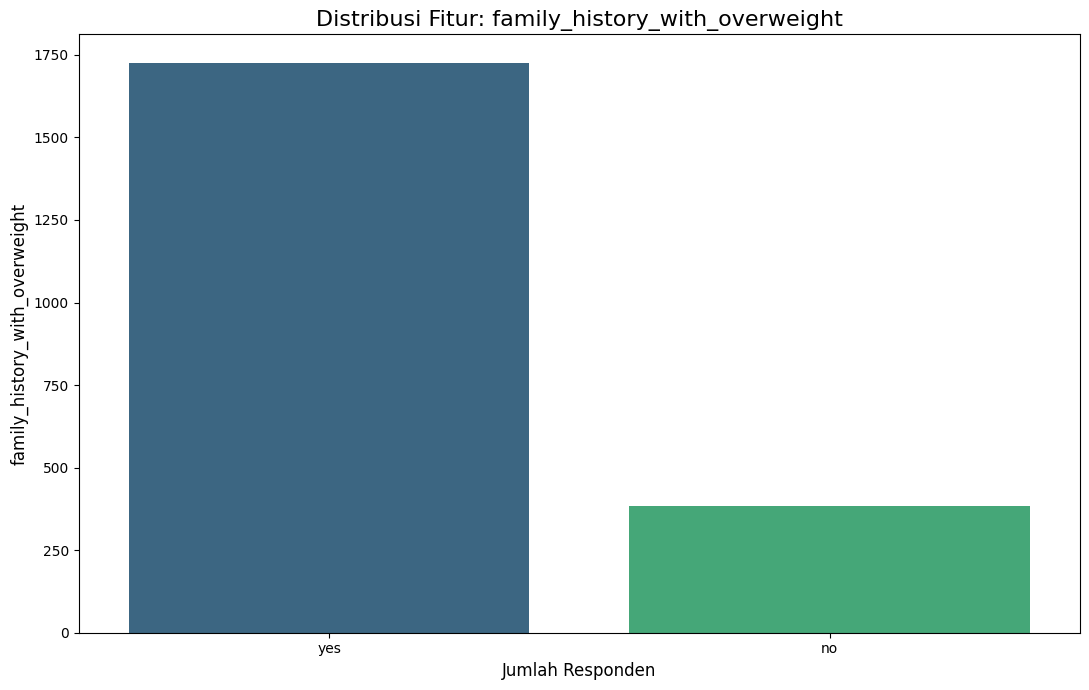

/tmp/ipython-input-3667667619.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


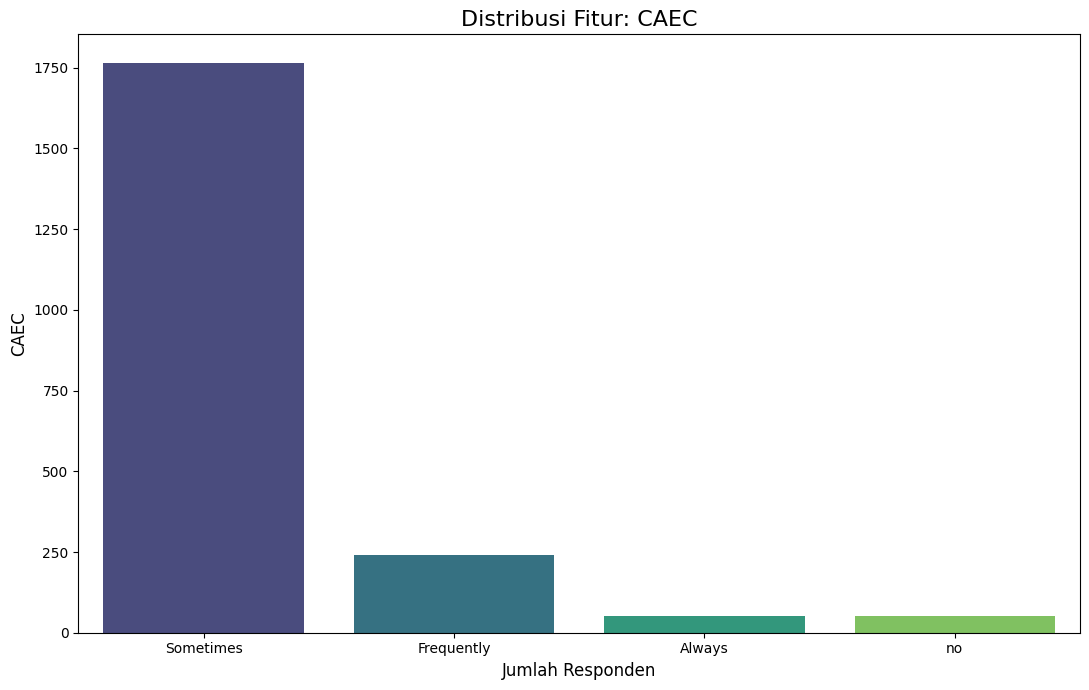

/tmp/ipython-input-3667667619.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


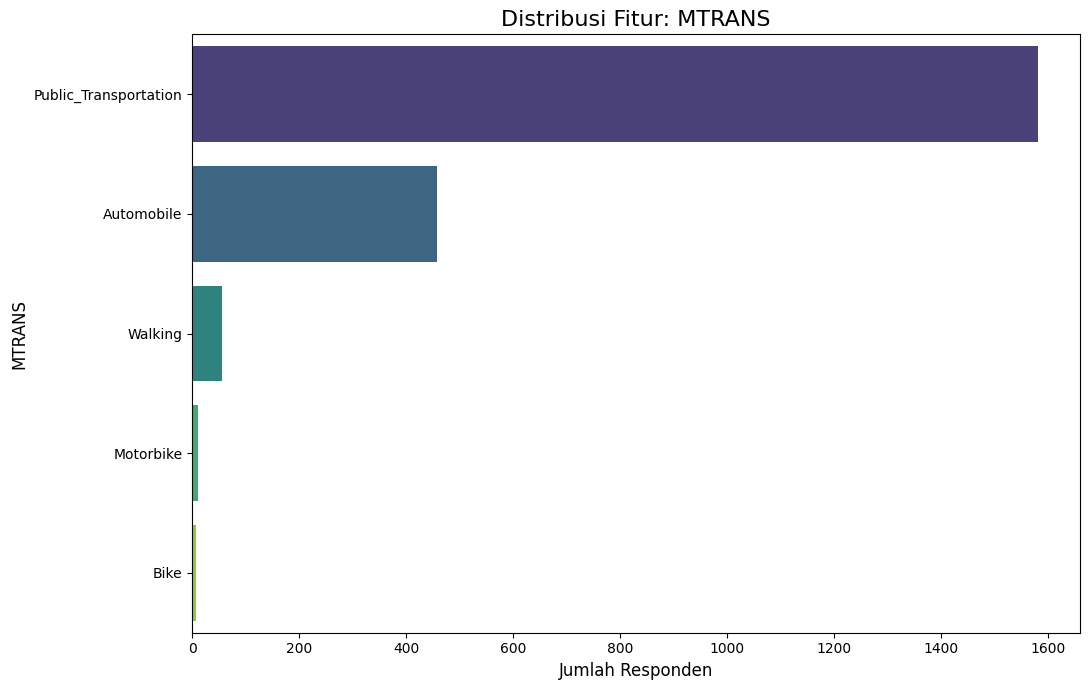

/tmp/ipython-input-3667667619.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, palette='viridis', order=df[feature].value_counts().index)


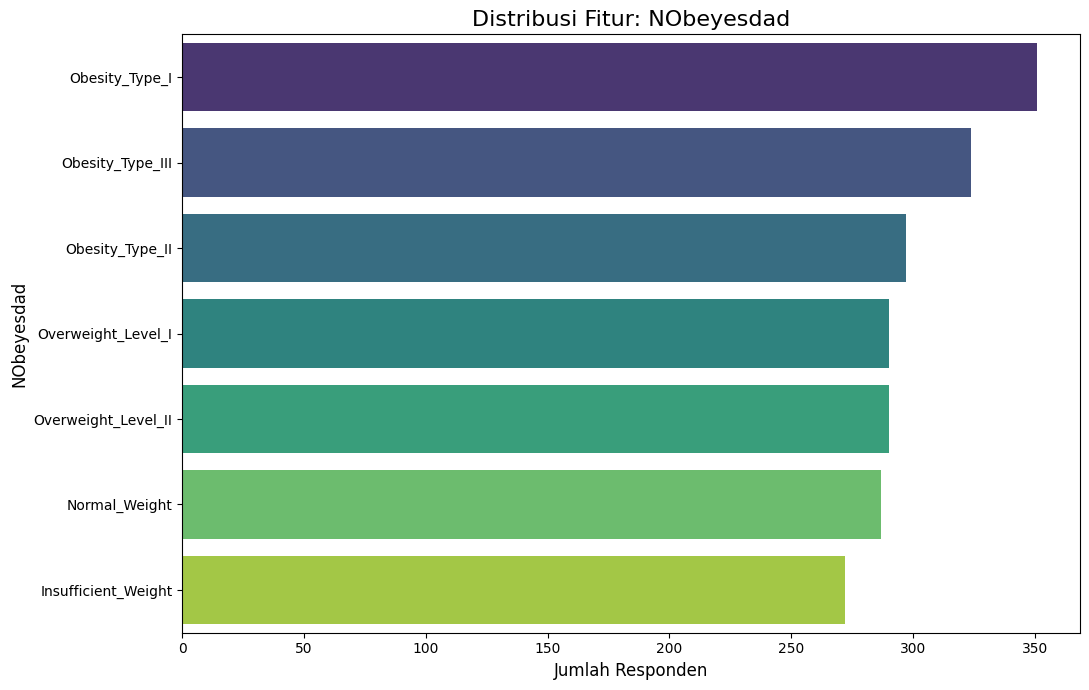

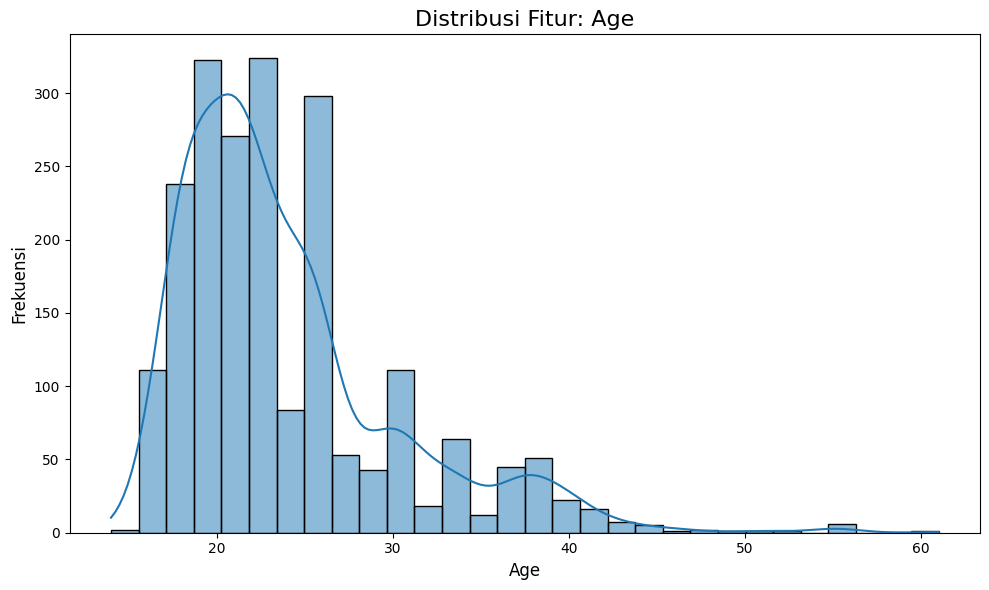

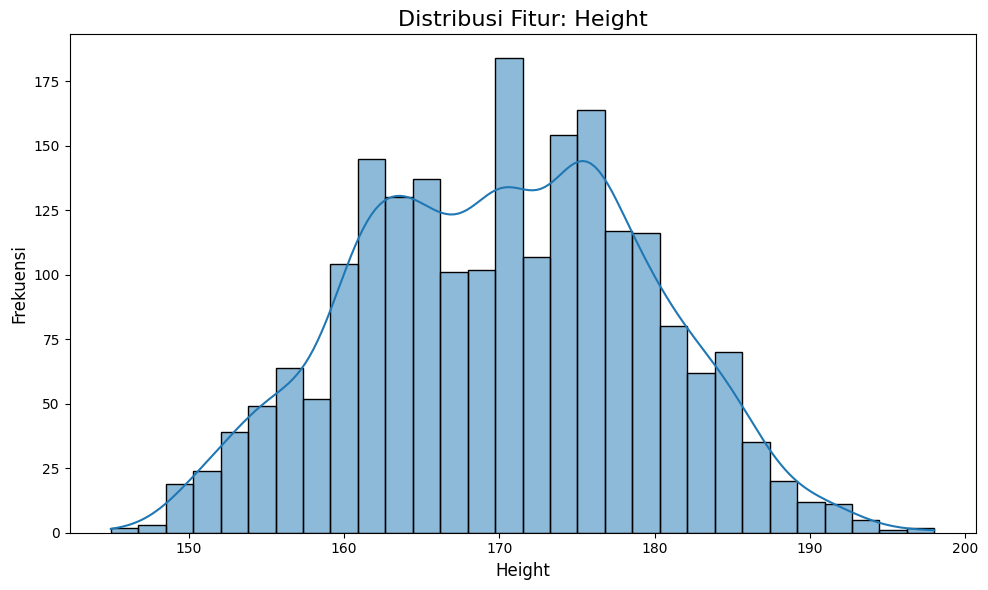

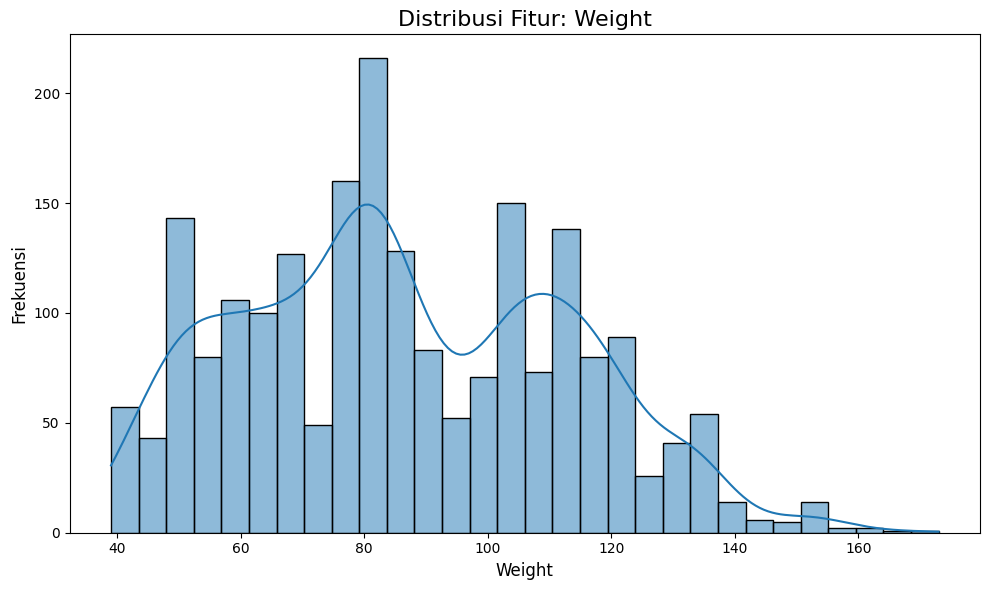

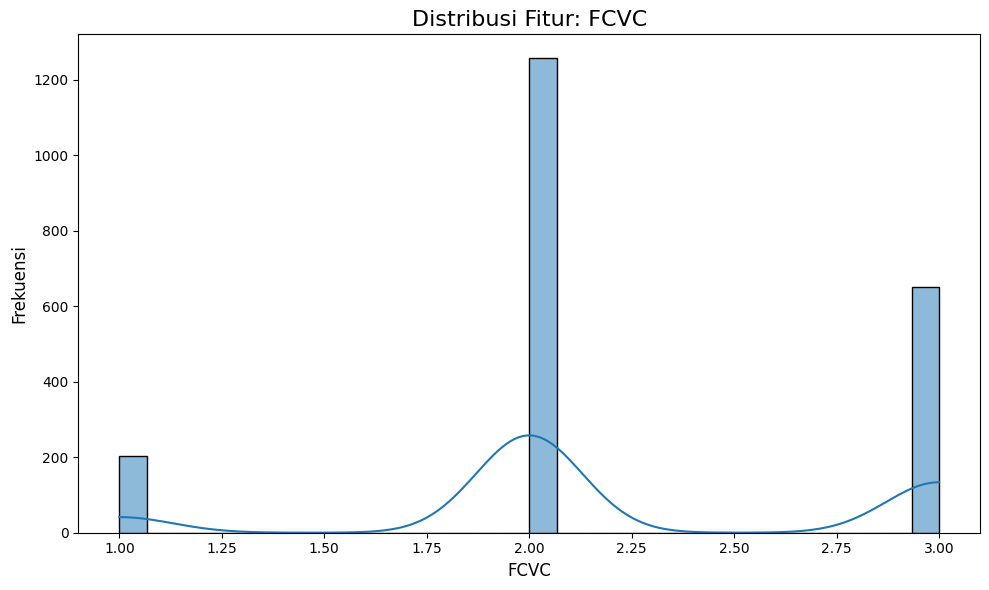

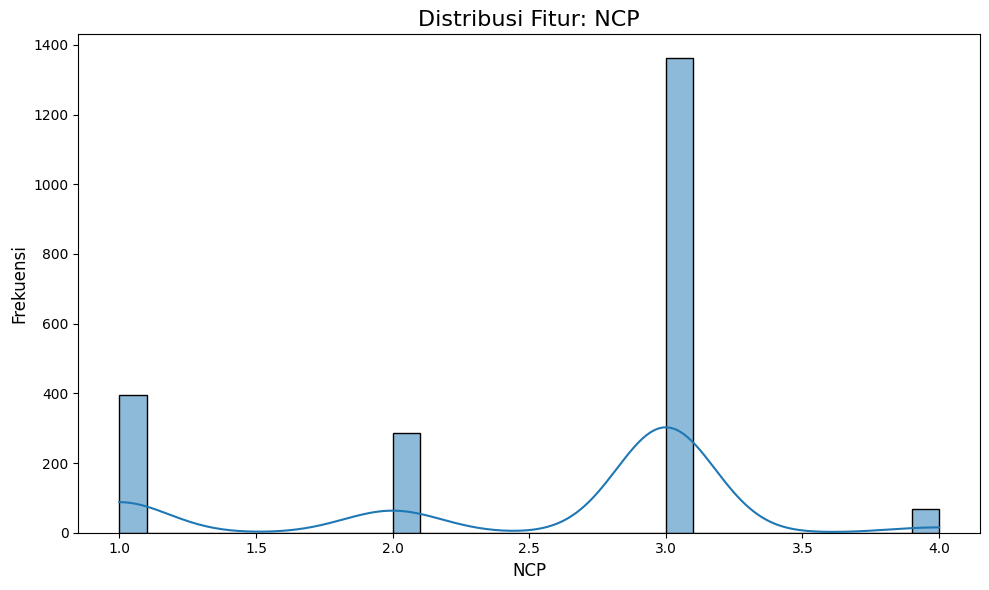

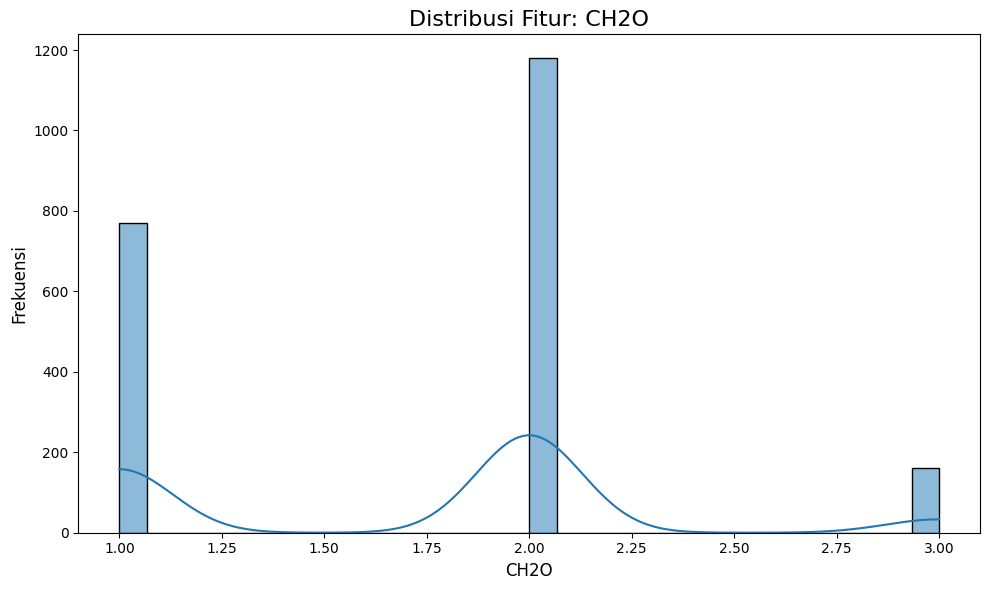

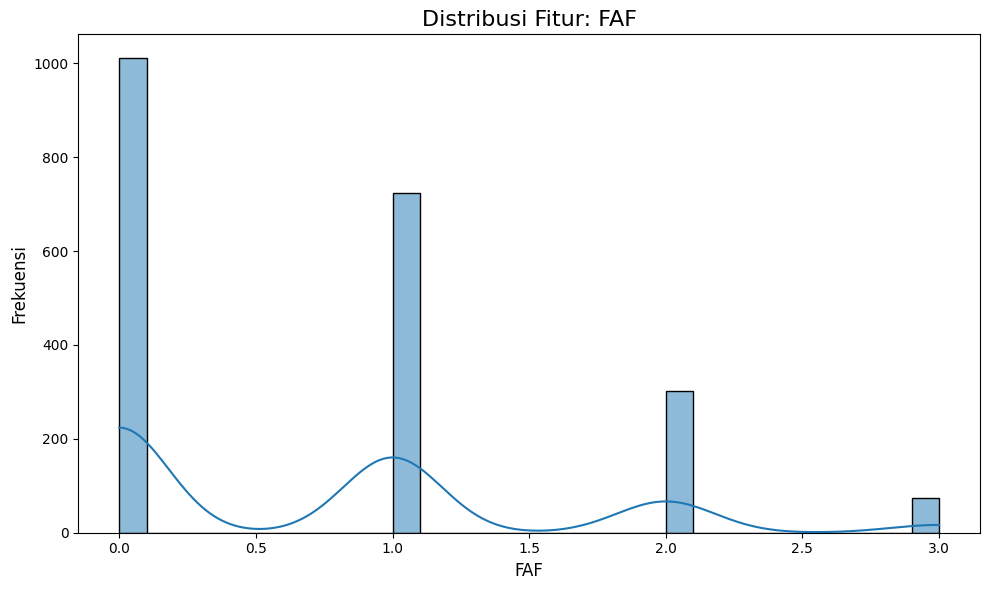

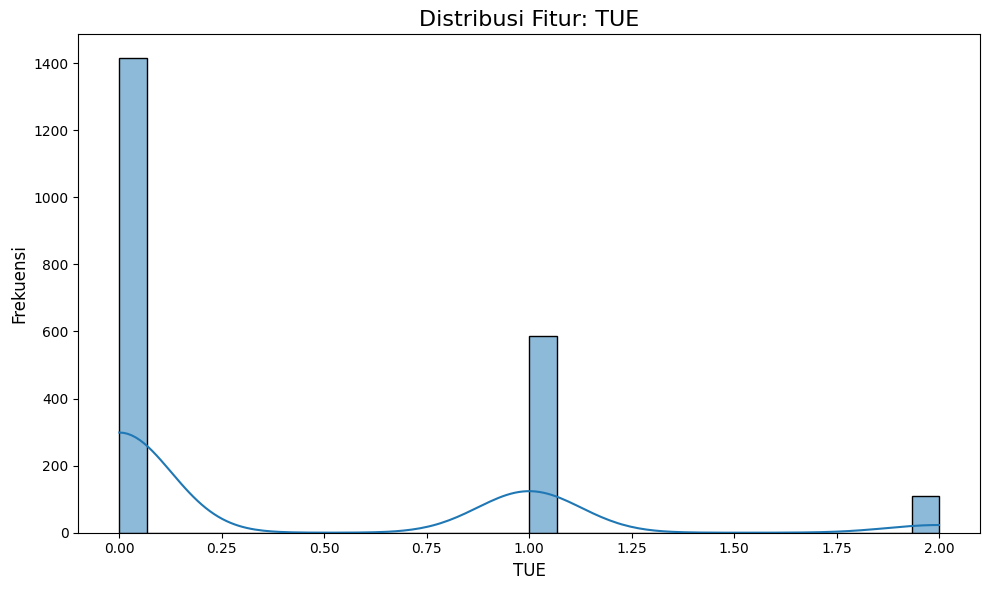

In [ ]:
def tampilkan_visualisasi_semua_fitur():

    categorical_features = df.select_dtypes(include=['object']).columns
    numerical_features = df.select_dtypes(include=['number']).columns

    print("\nMemulai proses penampilan plot...")
    print("Tutup jendela plot yang muncul untuk melanjutkan ke plot berikutnya.")

    for feature in categorical_features:
        plt.figure(figsize=(11, 7))
        if df[feature].nunique() > 4:
            sns.countplot(y=feature, data=df, palette='viridis', order=df[feature].value_counts().index)
        else:
            sns.countplot(x=feature, data=df, palette='viridis', order=df[feature].value_counts().index)

        plt.title(f'Distribusi Fitur: {feature}', fontsize=16)
        plt.xlabel('Jumlah Responden', fontsize=12)
        plt.ylabel(feature, fontsize=12)
        plt.tight_layout()
        plt.show()

    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[feature], kde=True, bins=30) # kde menambahkan garis kurva distribusi
        plt.title(f'Distribusi Fitur: {feature}', fontsize=16)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frekuensi', fontsize=12)
        plt.tight_layout()
        plt.show()

if __name__ == '__main__':
    tampilkan_visualisasi_semua_fitur()

### Heatmaps

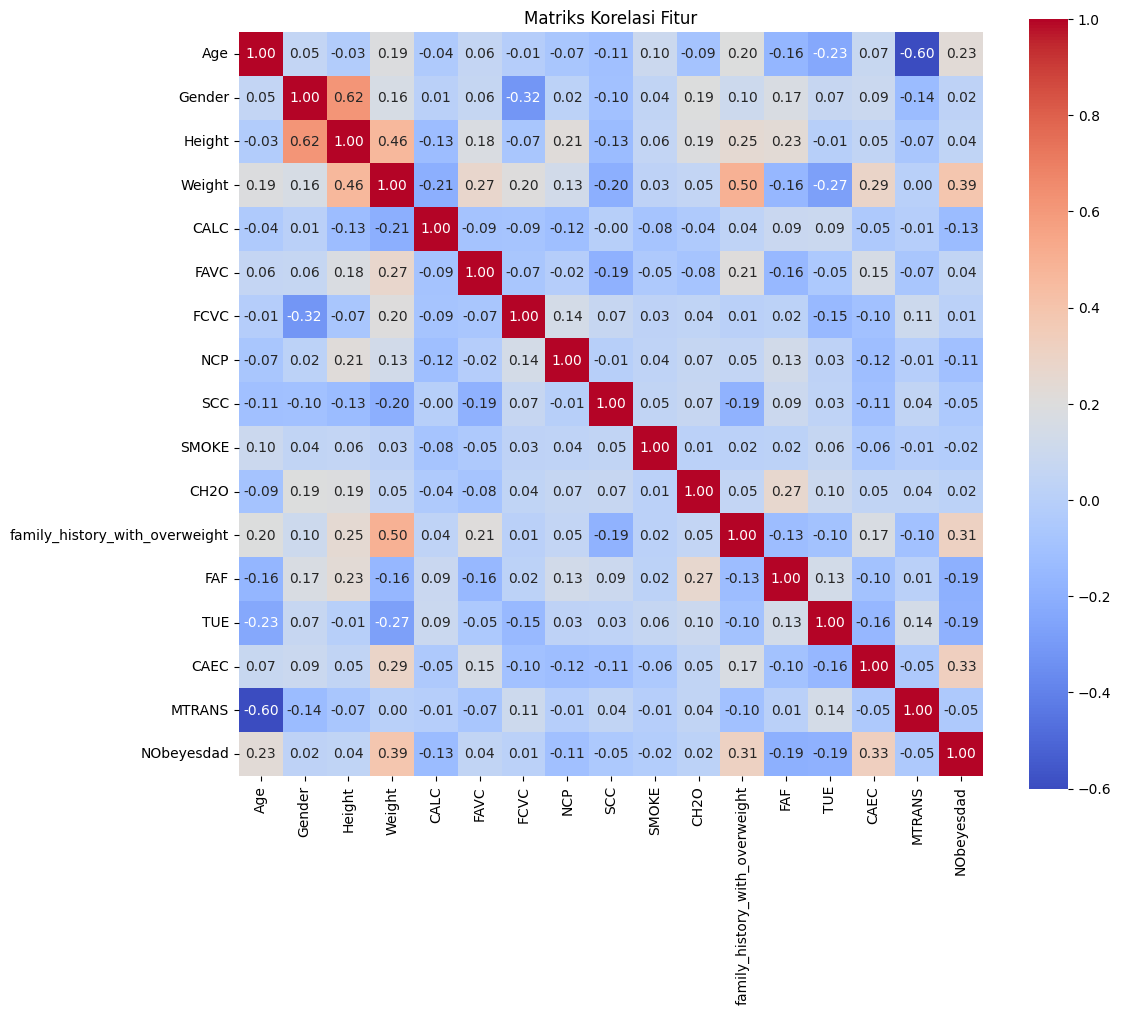

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriks Korelasi Fitur')
plt.show()

## Splitting the dataset into the Training set and Test set

In [ ]:
# Split data into 80% training and 20% temporary (for validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, test_size=0.2, random_state=seed_value, stratify=y
)

# Split temporary data into 50% validation and 50% test (which is 10% of original)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=seed_value, stratify=y_temp
)

print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")

X_train: (1688, 16)
X_val: (211, 16)
X_test: (212, 16)


## Inisiate CatBoost Model

In [ ]:
#Percobaan 1. CatBoost Model: learning rate = 0.05, iterasi = 1000 : BestTest = 0.07, BestLearn = 0.02, Iterasi = 998
#Percobaan 2. CatBoost Model: learning rate = 0.05, iterasi = 1500 : BestTest = 0.05, BestLearn = 0.01, Iterasi = 1499

In [ ]:
CatBoost_Model = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.05,
    depth=8,
    cat_features=categorical_features,
    loss_function='MultiClass',
    random_state=seed_value,
    verbose=0
)

## Training the CatBoost Classification model on the Validation Set

0:	learn: 1.8223288	test: 1.8169513	best: 1.8169513 (0)	total: 234ms	remaining: 5m 51s
100:	learn: 0.3111518	test: 0.3866327	best: 0.3866327 (100)	total: 18.5s	remaining: 4m 16s
200:	learn: 0.1524569	test: 0.2501935	best: 0.2501935 (200)	total: 26.9s	remaining: 2m 53s
300:	learn: 0.0909621	test: 0.1932154	best: 0.1932154 (300)	total: 36s	remaining: 2m 23s
400:	learn: 0.0658407	test: 0.1708743	best: 0.1708743 (400)	total: 47s	remaining: 2m 8s
500:	learn: 0.0514517	test: 0.1582326	best: 0.1582326 (500)	total: 55.6s	remaining: 1m 50s
600:	learn: 0.0415441	test: 0.1486394	best: 0.1486394 (600)	total: 1m 4s	remaining: 1m 36s
700:	learn: 0.0349059	test: 0.1428740	best: 0.1427722 (699)	total: 1m 13s	remaining: 1m 24s
800:	learn: 0.0294605	test: 0.1376556	best: 0.1376047 (797)	total: 1m 23s	remaining: 1m 12s
900:	learn: 0.0255782	test: 0.1336999	best: 0.1336999 (900)	total: 1m 31s	remaining: 1m
1000:	learn: 0.0225490	test: 0.1312645	best: 0.1312645 (1000)	total: 1m 41s	remaining: 50.7s
1100:	l

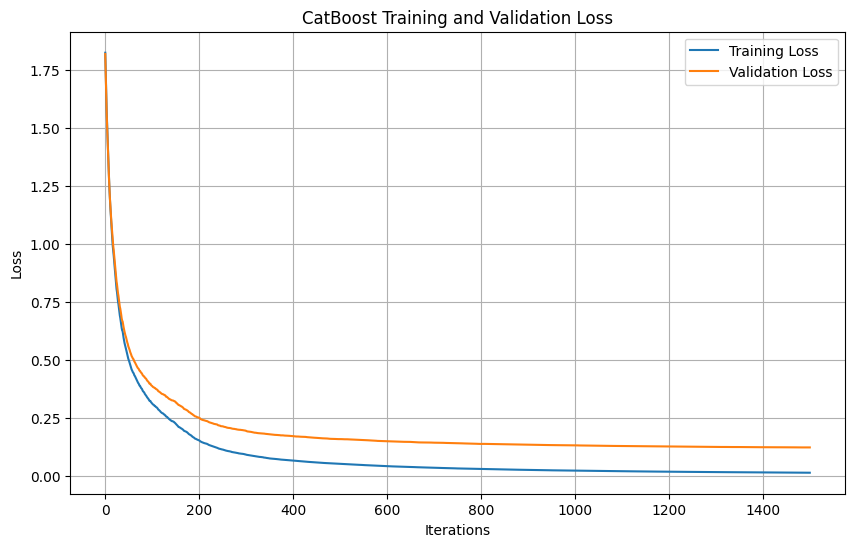

In [ ]:
# Train the model with verbose output to see the training progress
CatBoost_Model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=100)

# Get the evaluation history
eval_history = CatBoost_Model.get_evals_result()

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(eval_history['learn']['MultiClass'], label='Training Loss')
plt.plot(eval_history['validation']['MultiClass'], label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('CatBoost Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
CatBoost_Model.fit(X_train, y_train)
y_pred = CatBoost_Model.predict(X_val)
print("\n===== HASIL EVALUASI MODEL CatBoost =====")
accuracy = accuracy_score(y_val, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\n")

print("Classification Report:")
print(classification_report(y_val, y_pred))
print("============================================")


===== HASIL EVALUASI MODEL CatBoost =====
Akurasi Model: 96.21%


Confusion Matrix:
[[27  0  0  0  0  0  0]
 [ 1 27  0  0  0  1  0]
 [ 0  0 35  0  0  0  0]
 [ 0  0  1 29  0  0  0]
 [ 0  0  1  0 31  0  0]
 [ 0  2  0  0  0 26  1]
 [ 0  1  0  0  0  0 28]]


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        27
      Normal_Weight       0.90      0.93      0.92        29
     Obesity_Type_I       0.95      1.00      0.97        35
    Obesity_Type_II       1.00      0.97      0.98        30
   Obesity_Type_III       1.00      0.97      0.98        32
 Overweight_Level_I       0.96      0.90      0.93        29
Overweight_Level_II       0.97      0.97      0.97        29

           accuracy                           0.96       211
          macro avg       0.96      0.96      0.96       211
       weighted avg       0.96      0.96      0.96       211



/tmp/ipython-input-3376593503.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


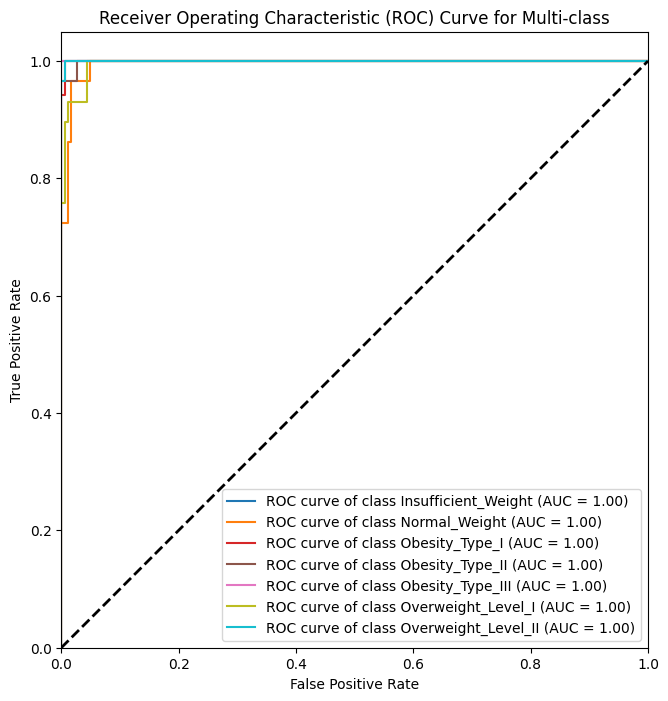


AUC for each class:
  Insufficient_Weight: 1.00
  Normal_Weight: 1.00
  Obesity_Type_I: 1.00
  Obesity_Type_II: 1.00
  Obesity_Type_III: 1.00
  Overweight_Level_I: 1.00
  Overweight_Level_II: 1.00


In [ ]:
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Get all unique classes from the training data to ensure all classes are included
all_classes = sorted(y_train.unique())

# Binarize the output
y_val_binarized = label_binarize(y_val, classes=all_classes)
n_classes = y_val_binarized.shape[1]

# Get the predicted probabilities for each class
# FIX: Use predict_proba instead of fit to get predicted probabilities
y_prob = CatBoost_Model.predict_proba(X_val)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Use RocCurveDisplay for plotting and getting results
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    # Use RocCurveDisplay.from_predictions to plot and get results for each class
    display = RocCurveDisplay.from_predictions(y_val_binarized[:, i], y_prob[:, i], name=f'ROC curve of class {all_classes[i]}', ax=ax, color=colors(i))
    fpr[i] = display.fpr
    tpr[i] = display.tpr
    roc_auc[i] = display.roc_auc


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

print("\nAUC for each class:")
for i in range(n_classes):
    print(f"  {all_classes[i]}: {roc_auc[i]:.2f}")

# Latihan

In [ ]:
# Predict on the test set
y_pred_test = CatBoost_Model.predict(X_test)

print("===== HASIL EVALUASI MODEL CatBoost PADA DATA TESTING =====")
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Akurasi Model pada Test Set: {accuracy_test * 100:.2f}%")
print("\n")
print("Confusion Matrix pada Test Set:")
print(confusion_matrix(y_test, y_pred_test))
print("\n")
print("Classification Report pada Test Set:")
print(classification_report(y_test, y_pred_test))
print("==========================================================")

===== HASIL EVALUASI MODEL CatBoost PADA DATA TESTING =====
Akurasi Model pada Test Set: 96.23%


Confusion Matrix pada Test Set:
[[25  2  0  0  0  0  0]
 [ 0 29  0  0  0  0  0]
 [ 0  0 34  0  0  1  0]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 33  0  0]
 [ 0  5  0  0  0 24  0]
 [ 0  0  0  0  0  0 29]]


Classification Report pada Test Set:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        27
      Normal_Weight       0.81      1.00      0.89        29
     Obesity_Type_I       1.00      0.97      0.99        35
    Obesity_Type_II       1.00      1.00      1.00        30
   Obesity_Type_III       1.00      1.00      1.00        33
 Overweight_Level_I       0.96      0.83      0.89        29
Overweight_Level_II       1.00      1.00      1.00        29

           accuracy                           0.96       212
          macro avg       0.97      0.96      0.96       212
       weighted avg       0.97      0.96      0.96

/tmp/ipython-input-1226262339.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


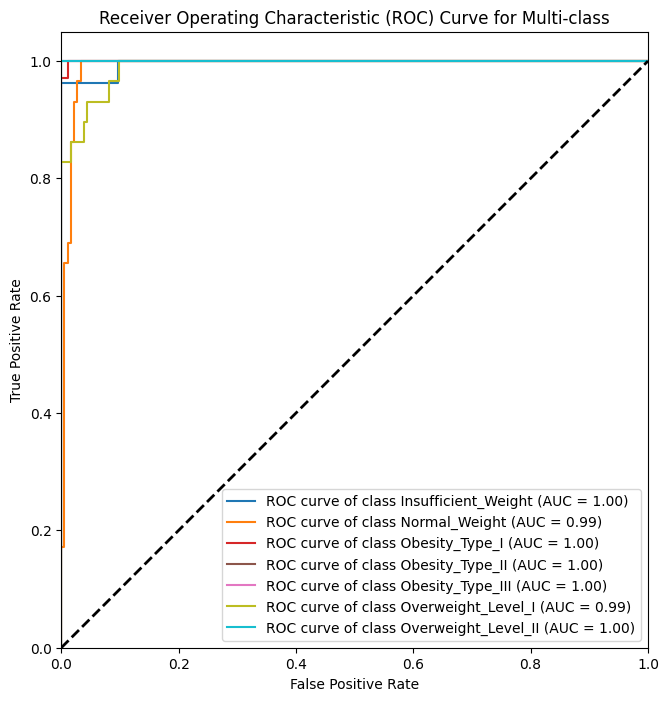


AUC for each class:
  Insufficient_Weight: 1.00
  Normal_Weight: 0.99
  Obesity_Type_I: 1.00
  Obesity_Type_II: 1.00
  Obesity_Type_III: 1.00
  Overweight_Level_I: 0.99
  Overweight_Level_II: 1.00


In [ ]:
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Get all unique classes from the training data to ensure all classes are included
all_classes = sorted(y_train.unique())

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=all_classes)
n_classes = y_test_binarized.shape[1]

# Get the predicted probabilities for each class
# FIX: Use predict_proba instead of fit to get predicted probabilities
y_prob = CatBoost_Model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Use RocCurveDisplay for plotting and getting results
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    # Use RocCurveDisplay.from_predictions to plot and get results for each class
    display = RocCurveDisplay.from_predictions(y_test_binarized[:, i], y_prob[:, i], name=f'ROC curve of class {all_classes[i]}', ax=ax, color=colors(i))
    fpr[i] = display.fpr
    tpr[i] = display.tpr
    roc_auc[i] = display.roc_auc


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

print("\nAUC for each class:")
for i in range(n_classes):
    print(f"  {all_classes[i]}: {roc_auc[i]:.2f}")

In [ ]:
def get_user_input():
    """Fungsi untuk mengambil input dari pengguna dengan validasi dan pilihan angka untuk kategorikal."""
    print("\nSilakan masukkan data untuk prediksi tingkat obesitas:")
    data = {}
    try:
        # Gender
        gender_choice = int(input("Jenis Kelamin (0: Female, 1: Male): "))
        data['Gender'] = 'Female' if gender_choice == 0 else 'Male'

        # Age
        data['Age'] = int(input("Umur: "))

        # Height
        data['Height'] = int(input("Tinggi Badan (cm): "))

        # Weight
        data['Weight'] = int(input("Berat Badan (kg): "))

        # family_history_with_overweight
        family_history_choice = int(input("Riwayat keluarga dengan berat badan berlebih? (0: no, 1: yes): "))
        data['family_history_with_overweight'] = 'no' if family_history_choice == 0 else 'yes'

        # FAVC
        favc_choice = int(input("Sering makan makanan tinggi kalori? (0: no, 1: yes): "))
        data['FAVC'] = 'no' if favc_choice == 0 else 'yes'

        # FCVC
        data['FCVC'] = int(input("Frekuensi makan sayur (1: Jarang, 2: Kadang-kadang, 3: Selalu): "))

        # NCP
        data['NCP'] = int(input("Berapa kali makan utama per hari? (1-4): "))

        # CAEC
        caec_choice = int(input("Makan di antara waktu makan? (0: Always, 1: Frequently, 2: No, 3: Sometimes): "))
        # FIX: Change 'No' to 'no' to match potential casing in original data
        caec_map = {0: 'Always', 1: 'Frequently', 2: 'no', 3: 'Sometimes'}
        data['CAEC'] = caec_map.get(caec_choice, 'no') # Default ke 'no' jika input tidak valid

        # SMOKE
        smoke_choice = int(input("Apakah Anda merokok? (0: no, 1: yes): "))
        data['SMOKE'] = 'no' if smoke_choice == 0 else 'yes'

        # CH2O
        data['CH2O'] = int(input("Berapa banyak air yang diminum setiap hari? (1: <1L, 2: 1-2L, 3: >2L): "))

        # SCC
        scc_choice = int(input("Memantau kalori yang Anda makan? (0: no, 1: yes): "))
        data['SCC'] = 'no' if scc_choice == 0 else 'yes'

        # FAF
        data['FAF'] = int(input("Aktivitas fisik (0: Tidak pernah, 1: 1-2 hari, 2: 2-3 hari, 3: >3 hari): "))

        # TUE
        data['TUE'] = int(input("Waktu penggunaan perangkat teknologi (0: <1 jam, 1: 1-2 jam, 2: >2 jam): "))

        # CALC
        calc_choice = int(input("Seberapa sering minum alkohol? (0: Always, 1: Frequently, 2: No, 3: Sometimes): "))
        # FIX: Change 'No' to 'no' to match potential casing in original data
        calc_map = {0: 'Always', 1: 'Frequently', 2: 'no', 3: 'Sometimes'}
        data['CALC'] = calc_map.get(calc_choice, 'no') # Default ke 'no' jika input tidak valid

        # MTRANS
        mtrans_choice = int(input("Transportasi yang biasa digunakan (0: Automobile, 1: Bike, 2: Motorbike, 3: Public_Transportation, 4: Walking): "))
        mtrans_map = {0: 'Automobile', 1: 'Bike', 2: 'Motorbike', 3: 'Public_Transportation', 4: 'Walking'}
        data['MTRANS'] = mtrans_map.get(mtrans_choice, 'Public_Transportation') # Default jika input tidak valid


        return pd.DataFrame([data])
    except ValueError:
        print("❌ Input tidak valid. Mohon masukkan data dalam format angka yang benar sesuai pilihan.")
        return None
    except KeyError:
        print("❌ Input pilihan tidak valid. Mohon masukkan angka pilihan yang tersedia.")
        return None


# Ambil input dari pengguna
data_pasien_baru = get_user_input()


Silakan masukkan data untuk prediksi tingkat obesitas:
Jenis Kelamin (0: Female, 1: Male): 1
Umur: 21
Tinggi Badan (cm): 168
Berat Badan (kg): 63
Riwayat keluarga dengan berat badan berlebih? (0: no, 1: yes): 0
Sering makan makanan tinggi kalori? (0: no, 1: yes): 0
Frekuensi makan sayur (1: Jarang, 2: Kadang-kadang, 3: Selalu): 3
Berapa kali makan utama per hari? (1-4): 3
Makan di antara waktu makan? (0: Always, 1: Frequently, 2: No, 3: Sometimes): 2
Apakah Anda merokok? (0: no, 1: yes): 0
Berapa banyak air yang diminum setiap hari? (1: <1L, 2: 1-2L, 3: >2L): 2
Memantau kalori yang Anda makan? (0: no, 1: yes): 0
Aktivitas fisik (0: Tidak pernah, 1: 1-2 hari, 2: 2-3 hari, 3: >3 hari): 1
Waktu penggunaan perangkat teknologi (0: <1 jam, 1: 1-2 jam, 2: >2 jam): 2
Seberapa sering minum alkohol? (0: Always, 1: Frequently, 2: No, 3: Sometimes): 2
Transportasi yang biasa digunakan (0: Automobile, 1: Bike, 2: Motorbike, 3: Public_Transportation, 4: Walking): 2


In [ ]:
print(data_pasien_baru)

  Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0   Male   21     168      63                             no   no     3    3   

  CAEC SMOKE  CH2O SCC  FAF  TUE CALC     MTRANS  
0   no    no     2  no    1    2   no  Motorbike  


In [ ]:
CatBoost_Model2 = CatBoostClassifier(
    iterations=1500,
    learning_rate=0.05,
    depth=8,
    loss_function='MultiClass',
    random_state=seed_value, # Menetapkan random state untuk model
    verbose=0
)

# Recreate X_transformed from the original df to ensure categorical columns are strings
X_transformed_for_encoding = df.drop('NObeyesdad', axis=1).copy()

# Salin data fitur dan siapkan dictionary untuk menyimpan LabelEncoders
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    # Fit the encoder on the original string data
    le.fit(X_transformed_for_encoding[col])
    label_encoders[col] = le

# Transform X_train menggunakan encoders yang sudah dilatih
X_train_encoded = X_train.copy()
for col, encoder in label_encoders.items():
    # Ensure the column exists and is not all NaN in X_train before attempting transform
    if col in X_train_encoded.columns and not X_train_encoded[col].isnull().all():
         X_train_encoded[col] = encoder.transform(X_train_encoded[col])
    else:
        # Handle cases where a column might be missing or all NaN in X_train (shouldn't happen with train_test_split)
        print(f"Warning: Column '{col}' not found or is all NaN in X_train_encoded. Skipping encoding.")


# Latih CatBoost_Model pada data yang sudah sepenuhnya numerik
# Ensure CatBoost_Model is defined - assuming it's defined in a previous cell
if 'CatBoost_Model' in locals():
    print("Training CatBoost Model on encoded training data...")
    CatBoost_Model2.fit(X_train_encoded, y_train, cat_features=categorical_features, verbose=0) # verbose=0 to avoid printing training steps again
    print("Training complete.")
else:
    print("Error: CatBoost_Model is not defined. Please run the cell that initializes CatBoost_Model first.")


categorical_names = {}
# Use columns from X_train_encoded to get numerical indices
for col in categorical_features:
    if col in X_train_encoded.columns:
        col_idx = X_train_encoded.columns.get_loc(col)
        categorical_names[col_idx] = label_encoders[col].classes_.tolist()


# Ensure explainer is created only if CatBoost_Model is trained
if 'CatBoost_Model' in locals():
    try:
        # Inisialisasi explainer LIME dengan random_state
        explainer = LimeTabularExplainer(
            training_data=X_train_encoded.values,
            feature_names=X_train_encoded.columns.tolist(),
            class_names=CatBoost_Model.classes_,
            categorical_features=[X_train_encoded.columns.get_loc(col) for col in categorical_features if col in X_train_encoded.columns], # Use indices from encoded data
            categorical_names= categorical_names,
            mode='classification',
            random_state=seed_value # Menetapkan random state di sini
        )
        print("Persiapan untuk LIME selesai. Model telah dilatih pada data numerik dan explainer siap.")
    except Exception as e:
        print(f"Error creating LIME explainer: {e}")
else:
     print("LIME explainer could not be created because CatBoost_Model is not defined.")

Training CatBoost Model on encoded training data...
Training complete.
Persiapan untuk LIME selesai. Model telah dilatih pada data numerik dan explainer siap.


Hasil Prediksi: Berat Badan Normal
Keyakinan Model: 97.24%

🔍 Menganalisis Faktor Dominan dengan LIME...

✅ Faktor Pendukung Prediksi:
- Weight <= 65.14 (Bobot Pengaruh: 0.40932)
- family_history_with_overweight=no (Bobot Pengaruh: 0.04380)
- 2.00 < FCVC <= 3.00 (Bobot Pengaruh: 0.03987)
- MTRANS=Motorbike (Bobot Pengaruh: 0.03130)
- SMOKE=no (Bobot Pengaruh: 0.02892)
- CALC=no (Bobot Pengaruh: 0.02725)
- FAVC=no (Bobot Pengaruh: 0.02092)
- SCC=no (Bobot Pengaruh: 0.01772)
- Gender=Male (Bobot Pengaruh: 0.01034)
- 1.00 < CH2O <= 2.00 (Bobot Pengaruh: 0.00713)
- 2.00 < NCP <= 3.00 (Bobot Pengaruh: 0.00627)
- 0.00 < FAF <= 1.00 (Bobot Pengaruh: 0.00428)
- TUE > 1.00 (Bobot Pengaruh: 0.00258)

❌ Faktor Bertentangan dengan Prediksi:
- CAEC=no (Bobot Pengaruh: -0.03186)
- 19.00 < Age <= 22.00 (Bobot Pengaruh: -0.00375)

Daftar Semua Fitur dan Bobot dari LIME:
[('Weight <= 65.14', 0.40932116971141347), ('family_history_with_overweight=no', 0.04380191524177748), ('2.00 < FCVC <= 3.00', 0.0398

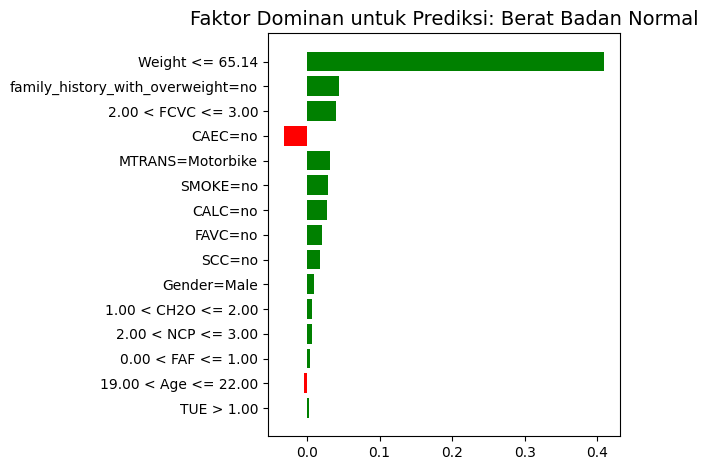

In [ ]:
# 2. Siapkan Data untuk Prediksi dan LIME (Encode Input Pasien)
pasien_encoded_df = data_pasien_baru.copy()
for col, encoder in label_encoders.items():
    # Check if the column exists in the new data before attempting to encode
    if col in pasien_encoded_df.columns:
        # Handle potential unseen values in the new data for categorical features
        try:
            pasien_encoded_df[col] = encoder.transform(pasien_encoded_df[col])
        except ValueError as e:
            print(f"Warning: Could not encode value(s) in column '{col}'. Error: {e}. Skipping encoding for this column.")
            # Optionally, you could replace unseen values with a default or handle differently

# Ensure the order of columns in pasien_encoded_df matches the order in X_train_encoded for prediction and LIME
pasien_encoded_aligned = pasien_encoded_df[X_train_encoded.columns]

# Make the prediction using the encoded and aligned data
# Use CatBoost_Model which was trained with cat_features for prediction
hasil_prediksi_nama = CatBoost_Model.predict(pasien_encoded_aligned)[0][0]
prediksi_proba = CatBoost_Model.predict_proba(pasien_encoded_aligned)

deskripsi_hasil = {
    'Insufficient_Weight': 'Kekurangan Berat Badan', 'Normal_Weight': 'Berat Badan Normal',
    'Overweight_Level_I': 'Kelebihan Berat Badan Tingkat I', 'Overweight_Level_II': 'Kelebihan Berat Badan Tingkat II',
    'Obesity_Type_I': 'Obesitas Tingkat I', 'Obesity_Type_II': 'Obesitas Tingkat II', 'Obesity_Type_III': 'Obesitas Tingkat III'
}

print("=" * 50)
print(f"Hasil Prediksi: {deskripsi_hasil.get(hasil_prediksi_nama, 'Kategori tidak dikenal')}")

daftar_kelas = list(CatBoost_Model.classes_)
kelas_prediksi_index = daftar_kelas.index(hasil_prediksi_nama)
probabilitas_prediksi = prediksi_proba[0][kelas_prediksi_index]
print(f"Keyakinan Model: {probabilitas_prediksi:.2%}")
print("=" * 50)

# 3. Hasilkan Penjelasan LIME
print("\n🔍 Menganalisis Faktor Dominan dengan LIME...")

# Create a wrapper function for LIME to call predict_proba
def catboost_predict_proba_wrapper(numpy_data):
    # Convert the numpy array back to a pandas DataFrame, maintaining column names and order
    df_from_numpy = pd.DataFrame(numpy_data, columns=X_train_encoded.columns)
    df_decoded = df_from_numpy.copy()
    for col in categorical_features:
        if col in df_decoded.columns:
            # Use inverse_transform from the fitted label_encoders
            # Handle potential unseen labels during inverse_transform if necessary
            try:
                 df_decoded[col] = label_encoders[col].inverse_transform(df_decoded[col].astype(int))
            except ValueError as e:
                 print(f"Warning: Could not inverse transform value(s) in column '{col}'. Error: {e}. Keeping encoded values.")
                 # If inverse transform fails (e.g., unseen encoded value), keep the encoded value
    return CatBoost_Model.predict_proba(df_decoded)
explanation = explainer.explain_instance(
    pasien_encoded_aligned.iloc[0].values, # Use the aligned and encoded data for LIME
    # Pass the wrapper function to LIME
    catboost_predict_proba_wrapper,
    num_features=15, top_labels=1,
)

# 4. Tampilkan Hasil Penjelasan (Sudah bisa dibaca, not manually decoded due to LIME)
top_label_index = explanation.top_labels[0]
# LIME automatically uses the class names provided during explainer initialization, no manual decoding needed here
hasil_lime = explanation.as_list(label=top_label_index)


print("\n✅ Faktor Pendukung Prediksi:")
for feature, weight in hasil_lime:
    if weight >= 0:
        print(f"- {feature} (Bobot Pengaruh: {weight:.5f})")

print("\n❌ Faktor Bertentangan dengan Prediksi:")
for feature, weight in hasil_lime:
    if weight < 0:
        print(f"- {feature} (Bobot Pengaruh: {weight:.5f})")

print("\nDaftar Semua Fitur dan Bobot dari LIME:")
print(explanation.as_list(label=top_label_index))

# 5. Tampilkan Plot LIME
print("\n--- Visualisasi Faktor Pengaruh ---")
fig = explanation.as_pyplot_figure(label=top_label_index)
plt.title(f'Faktor Dominan untuk Prediksi: {deskripsi_hasil.get(hasil_prediksi_nama)}', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
explanation.show_in_notebook(show_table=True)

### Menyimpan dan Memuat Hasil Analisis LIME untuk Konsistensi

In [ ]:
import numpy as np

# Pastikan data_pasien_baru sudah ada dari input pengguna
if 'data_pasien_baru' in locals() and data_pasien_baru is not None:
    # Tentukan fitur kontinu dan nama kolom target
    continuous_features = df.select_dtypes(include=['number']).columns.tolist()
    target_name = 'NObeyesdad'

    if target_name in continuous_features:
        continuous_features.remove(target_name)

    # 1. Inisialisasi objek Data untuk DiCE
    d = dice_ml.Data(dataframe=df,
                     continuous_features=continuous_features,
                     outcome_name=target_name)

    # 2. Inisialisasi objek Model untuk DiCE
    m = dice_ml.Model(model=CatBoost_Model, backend="sklearn")

    # 3. Buat explainer DiCE
    exp = dice_ml.Dice(d, m, method="random")

    # 4. Ambil data pasien yang akan dijelaskan
    query_instance = data_pasien_baru[X_train.columns]

    # 5. Hasilkan counterfactuals
    predicted_class_name = CatBoost_Model.predict(query_instance)[0][0]

    try:
        class_names = m.model.classes_.tolist()
        desired_class_index = class_names.index(predicted_class_name)

        print(f"INFO: Mencari counterfactuals untuk kelas target: '{predicted_class_name}' (ditemukan pada indeks: {desired_class_index})")

        # Tentukan fitur yang tidak boleh diubah SAMA SEKALI
        features_to_exclude_completely = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight']
        # Tentukan fitur dengan batasan nilai yang lebih masuk akal
        features_with_realistic_ranges = {
            'CALC': ['no', 'Sometimes'], # Batasi alkohol hanya ke 'no' atau 'Sometimes' jika aslinya 'no'
            'SMOKE': ['no'], # Batasi rokok hanya ke 'no'
            'TUE': [0, 1], # Batasi waktu penggunaan teknologi ke <= 2 jam (0 atau 1)
            'FAF': [1, 2, 3] # Batasi aktivitas fisik agar tidak pernah 0 (1, 2, atau 3)
        }


        # Gabungkan batasan: fitur yang dikecualikan total DAN fitur dengan rentang realistis
        permitted_range = {}
        for feature in features_to_exclude_completely:
            if feature in query_instance.columns:
                permitted_range[feature] = [query_instance[feature].iloc[0], query_instance[feature].iloc[0]]

        for feature, allowed_values in features_with_realistic_ranges.items():
             if feature in query_instance.columns:
                 # Untuk fitur kategorikal
                 if feature in categorical_features:
                      # Pastikan nilai asli ada di allowed_values, jika tidak, gunakan nilai asli saja
                     if query_instance[feature].iloc[0] in allowed_values:
                         permitted_range[feature] = allowed_values
                     else:
                           if feature not in permitted_range: # Hanya tambahkan jika belum dibatasi total
                                permitted_range[feature] = allowed_values
                           print(f"Note: Original value '{query_instance[feature].iloc[0]}' for feature '{feature}' is not in specified allowed_values {allowed_values}. Allowing specified range anyway.")


                 # Untuk fitur numerik (allowed_values harus berupa [min, max] atau list of discrete values for int)
                 elif feature in continuous_features:
                      # Jika allowed_values adalah list diskrit untuk integer (seperti FAF, TUE)
                      if all(isinstance(x, int) for x in allowed_values):
                           min_val = min(allowed_values)
                           max_val = max(allowed_values)
                           original_value = query_instance[feature].iloc[0]
                           if original_value >= min_val and original_value <= max_val:
                                permitted_range[feature] = [min_val, max_val]
                           else:
                                permitted_range[feature] = [original_value, original_value]
                                print(f"Warning: Original value '{original_value}' for numerical feature '{feature}' is outside specified allowed range [{min_val}, {max_val}]. Fixing to original value.")

                      elif isinstance(allowed_values, list) and len(allowed_values) == 2:
                           # Standard [min, max] range for numerical features
                           permitted_range[feature] = allowed_values
                      else:
                           print(f"Warning: Invalid allowed_values format for numerical feature '{feature}'. Expected [min, max] or a list of discrete ints. Skipping specific range restriction.")
                 else:
                      print(f"Warning: Feature '{feature}' not found in continuous or categorical features. Skipping specific range restriction.")


        dice_exp = exp.generate_counterfactuals(query_instance,
                                                total_CFs=6,
                                                desired_class=desired_class_index,
                                                permitted_range=permitted_range # Gunakan batasan yang diperbarui
                                               )

        # 6. Tampilkan hasilnya
        print("\n==================================================")
        print("Analisis Counterfactual (Apa yang harus diubah?)")
        print("==================================================\n")
        dice_exp.visualize_as_dataframe(show_only_changes=False)

    except ValueError:
        print(f"❌ KESALAHAN: Kelas target '{predicted_class_name}' tidak ditemukan dalam daftar kelas model.")
        if 'm' in locals() and hasattr(m.model, 'classes_'):
             print(f"Daftar kelas yang tersedia adalah: {m.model.classes_.tolist()}")
        print("Mohon periksa kembali nama kelas yang diinginkan (kapitalisasi, spasi, dll).")

else:
    print("❌ Silakan jalankan sel untuk memasukkan data pasien baru terlebih dahulu.")

INFO: Mencari counterfactuals untuk kelas target: 'Normal_Weight' (ditemukan pada indeks: 1)


100%|██████████| 1/1 [00:00<00:00,  6.07it/s]


Analisis Counterfactual (Apa yang harus diubah?)

Query instance (original outcome : Normal_Weight)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Male,168,63,no,no,3,3,no,no,2,no,1,2,no,Motorbike,Normal_Weight



Diverse Counterfactual set (new outcome: Normal_Weight)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Male,168,63,no,no,2,3,no,no,2,no,1,2,Frequently,Motorbike,Normal_Weight
1,21,Male,168,63,Sometimes,no,3,3,no,no,2,no,3,2,no,Motorbike,Normal_Weight
2,21,Male,168,63,Sometimes,no,3,2,no,no,2,no,1,2,no,Motorbike,Normal_Weight
3,21,Male,168,63,Sometimes,no,3,3,no,no,2,no,2,2,no,Motorbike,Normal_Weight
4,21,Male,168,63,no,no,3,3,no,no,3,no,3,2,no,Motorbike,Normal_Weight
5,21,Male,168,63,no,no,1,3,no,no,2,no,1,2,no,Motorbike,Normal_Weight
